<a href="https://colab.research.google.com/github/IsraelPanazollo/Analise_Estatistica/blob/main/An%C3%A1lise_Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>ANÁLISE ESTATÍSTICA</font>
***

# Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm

## Verificação das versões

In [2]:
print('Versão do pandas -> %s' % pd.__version__)
print('Versão do numpy -> %s' % np.__version__)
print('Versão do seaborn -> %s' % sns.__version__)
print('Versão do scipy -> %s' % scipy.__version__)

Versão do pandas -> 1.5.3
Versão do numpy -> 1.25.2
Versão do seaborn -> 0.13.1
Versão do scipy -> 1.11.4


# Exploração do conjunto de dados

Este conjunto de dados foi obtido da Pesquisa Nacional por Amostra de Domicílios - PNAD de 2015 e foi tratado pela Alura. Os dados apresentam as características gerais da população, de educação, trabalho, rendimento e habitação, entre outras.

Dentre os tratamentos anteriores destaca-se:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

## Leitura do arquivo

In [3]:
dados = pd.read_csv("dados.csv")

In [4]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## Reescrever os dados

Nota-se que algumas colunas estão utilizando códigos para representar seus valores. Será interessante redefinir para que as informações fiquem mais explícitas. Segue abaixo como são esses valores e seus códigos:


> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|




Cria-se um dicionário com as colunas e como os valores devem ser.

In [5]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}

anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}

uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [6]:
mapeamento = {'Sexo': sexo, 'Cor': cor, 'UF':uf}
dados = dados.replace(mapeamento)

In [7]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,12,800,1.603808
1,Rondônia,Feminino,23,Branca,12,1150,1.739790
2,Rondônia,Feminino,35,Parda,15,880,1.760444
3,Rondônia,Masculino,46,Branca,6,3500,1.783158
4,Rondônia,Feminino,47,Parda,9,150,1.690631


## Análises preliminares

Verificar o número de registros e características existentes

In [8]:
dados.shape

(76840, 7)

Verificar a contagem de registros, a existência de registros nulos e o tipo de cada coluna de dado

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  object 
 1   Sexo            76840 non-null  object 
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  object 
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 4.1+ MB


In [10]:
dados.dtypes

UF                 object
Sexo               object
Idade               int64
Cor                object
Anos de Estudo      int64
Renda               int64
Altura            float64
dtype: object

Descrição das principais características estatísticas, como os quartis, média, mediana, desvio padrão, valor máximo e mínimo além da contagem de registros.

In [11]:
dados.describe()

,Idade,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000
mean,44.071421,9.469664,2000.383199,1.699512
std,12.480583,4.539929,3323.387730,0.079717
min,13.000000,1.000000,0.000000,1.339245
25%,34.000000,6.000000,788.000000,1.645785
50%,43.000000,11.000000,1200.000000,1.699325
75%,53.000000,12.000000,2000.000000,1.753062
max,99.000000,17.000000,200000.000000,2.028497


## Análise descritiva dos dados com foco na renda

Definir intervalos das classes de renda

In [12]:
salario_minimo = 788.00
classes = [
    dados.Renda.min(),
    2 * salario_minimo,
    5 * salario_minimo,
    15 * salario_minimo,
    25 * salario_minimo,
    dados.Renda.max()
]
classes

[0, 1576.0, 3940.0, 11820.0, 19700.0, 200000]

Definir etiqueta para as classes

In [13]:
labels = ['E', 'D', 'C', 'B', 'A']

Construir uma coluna de frequências

In [14]:
frequencia = pd.value_counts(
  pd.cut(x = dados['Renda'],
         bins = classes,
         labels = labels,
         include_lowest = True)
)
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

Construir uma coluna de frequências em percentual

In [15]:
percentual = pd.value_counts(
  pd.cut(x = dados.Renda,
         bins = classes,
         labels = labels,
         include_lowest = True),
  normalize = True
) * 100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

Criar um dataframe com as informações de frequência e porcentagem

In [16]:
dist_freq_renda = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_renda.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


Visualização dessas classes de renda com um gráfico de barras

<Axes: >

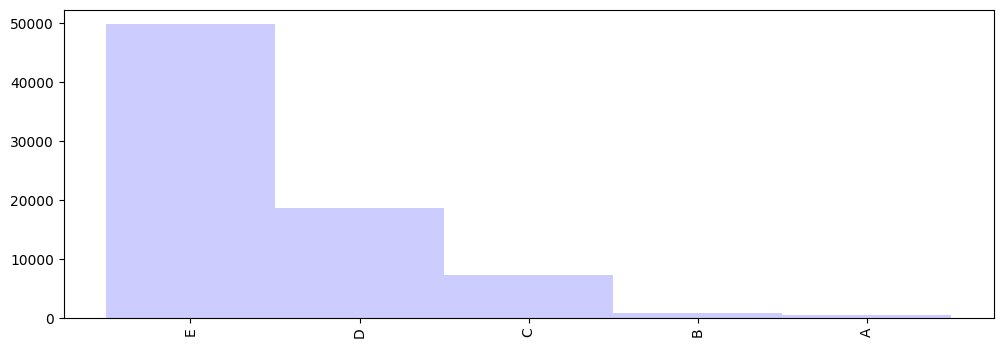

In [17]:
dist_freq_renda['Frequência'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize=(12, 4))

Distribuição da renda através de um histograma

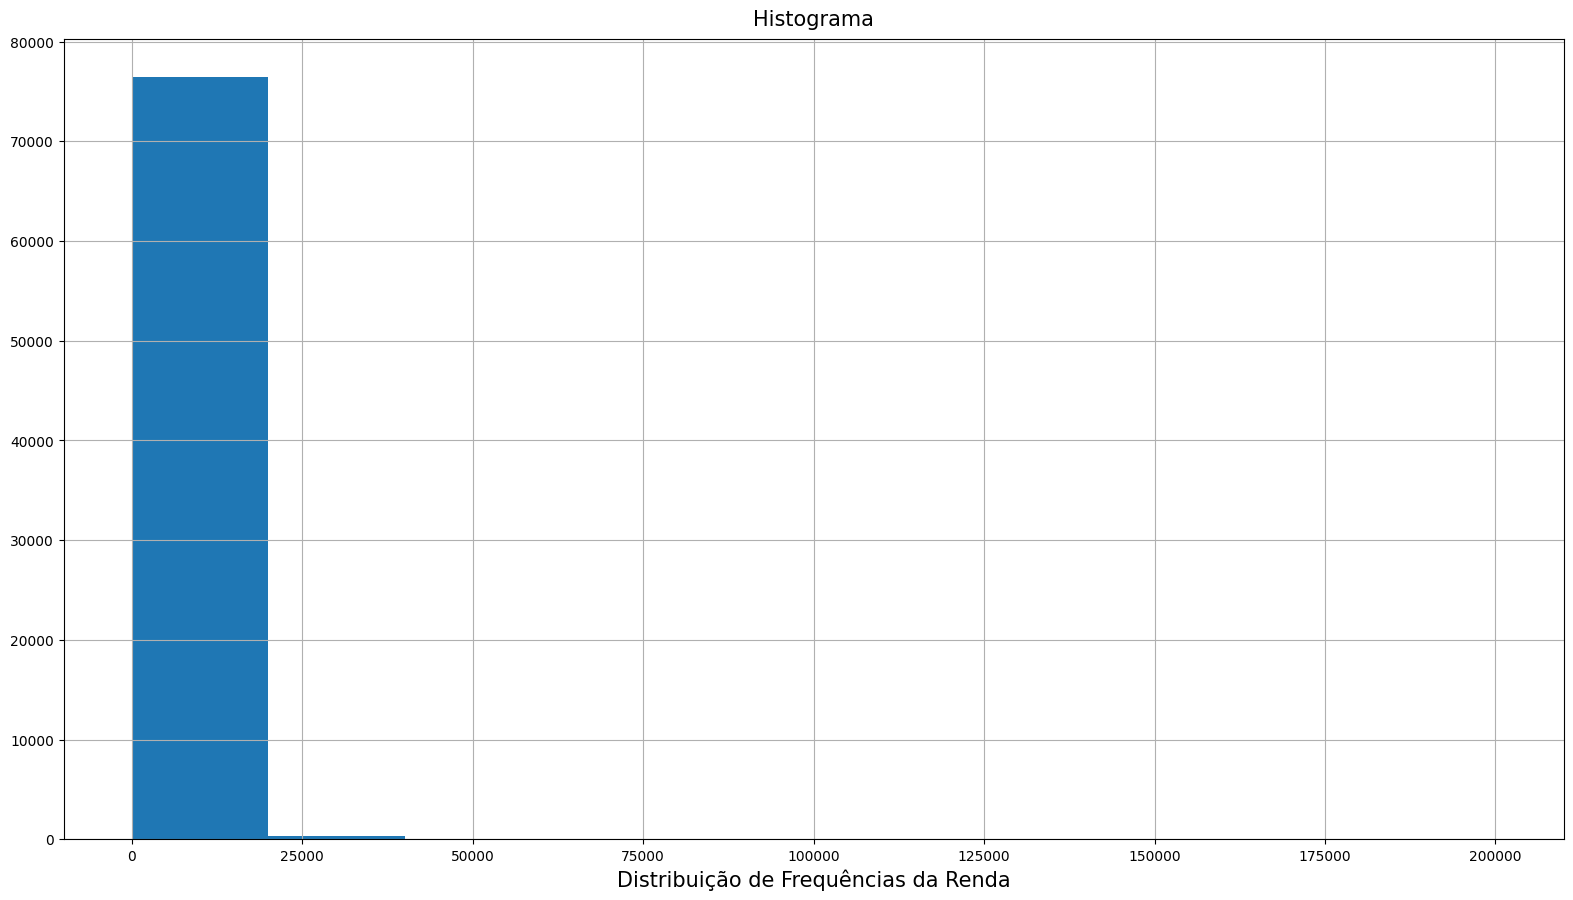

In [18]:
fig = plt.figure(figsize = (15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.hist(dados['Renda'])
eixo.set_title('Histograma', fontsize = 15, pad = 10)
eixo.set_xlabel('Distribuição de Frequências da Renda', fontsize = 15)
eixo.grid(True)

Comparação da distribuição de renda entre anos de estudos atráves de um boxplot, porém para evitar problemas com outliers atrapalhando a visualização utilizaremos uma seleção dos dados para até 12.000 reais em renda.

<ipython-input-19-d739b1def863>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)


<Axes: title={'center': 'Box-plot da Renda por Anos de Estudo'}, xlabel='R$', ylabel='Anos de Estudo'>

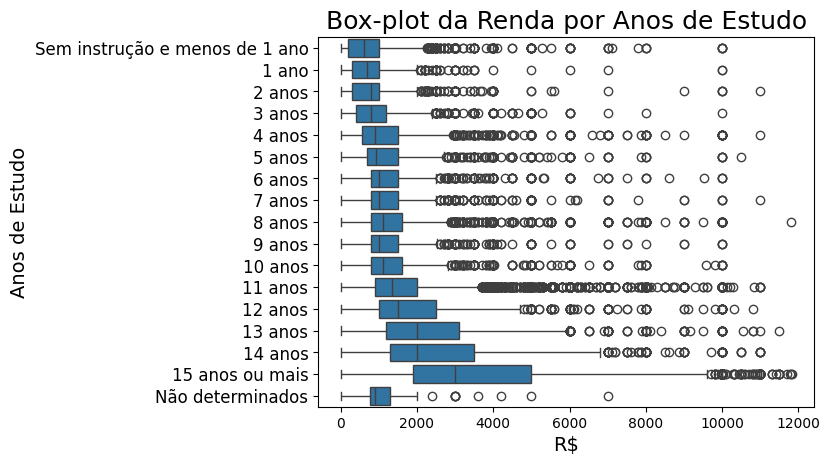

In [19]:
selecao = dados.query('Renda < 12000').sort_values(by = 'Anos de Estudo')

ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', data=selecao, orient='h')
ax.set_title('Box-plot da Renda por Anos de Estudo', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Anos de Estudo', fontsize=14)
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)
ax

Além disso é possível comparar as rendas, entre os estados, através do boxplot comparados

<Axes: title={'center': 'Box-plot da Renda por UF'}, xlabel='R$', ylabel='UF'>

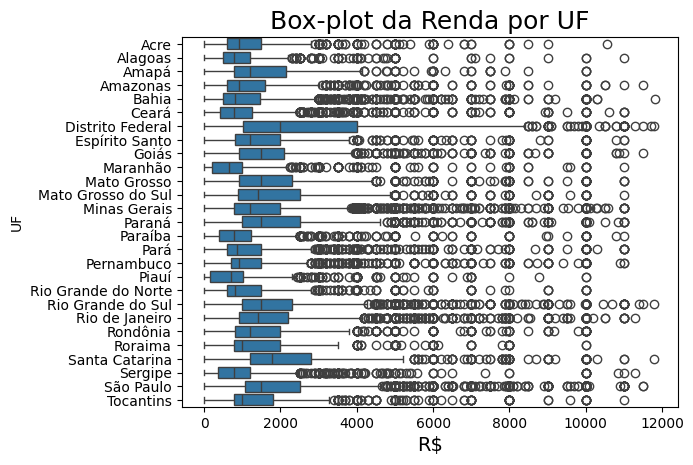

In [20]:
selecao = dados.query('Renda < 12000').sort_values(by = 'UF')

ax = sns.boxplot(x = 'Renda', y = 'UF', data=selecao, orient='h')
ax.set_title('Box-plot da Renda por UF', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

Avaliar a renda dos homens e mulheres em função dos anos de estudo atráves de uma tabela cruzada

In [21]:
tabela = pd.crosstab(dados['Sexo'],
                     dados['Anos de Estudo'],
                         aggfunc = 'mean',
                         values = dados['Renda'])
tabela.rename(index = sexo, inplace = True)
tabela.rename(columns = anos_de_estudo , inplace = True)
tabela

Anos de Estudo,Sem instrução e menos de 1 ano,1 ano,2 anos,3 anos,4 anos,5 anos,6 anos,7 anos,8 anos,9 anos,10 anos,11 anos,12 anos,13 anos,14 anos,15 anos ou mais,Não determinados
Sexo,,,,,,,,,,,,,,,,,
Feminino,516.201748,492.771987,529.911638,546.853916,704.279111,781.389776,833.732824,830.751004,933.615351,868.02170,925.919225,1286.790889,1682.313725,1911.730047,2226.460457,3899.513231,798.174419
Masculino,799.494638,895.629047,931.178986,1109.203862,1302.329283,1338.653218,1448.875419,1465.497940,1639.396667,1508.03885,1731.270847,2117.060504,2470.330776,3195.099154,3706.620269,6134.279790,1295.761905


### Conclusões

À partir da análise dos gráficos e tabelas, algumas conclusões podem ser inferidas:
Há uma grande concentração de pessoas ganhando pouco e poucas pessoas ganhando muito.
Aqueles que possuem mais anos de estudo, tem a tendência de terem melhores rendas.
A renda dos homens parece ser maior que a renda das mulheres em média.

# Testes estatísticos

### Validar a hipótese de que os homens tem renda média maior que as mulheres

Verificar se a renda se comporta como uma distribuição normal. Deseja-se saber com 95% de confiança.

In [22]:
from scipy.stats import normaltest

stat_test, p_valor = normaltest(dados['Renda'])
print("A estatística teste é: ", stat_test)
print("O p_valor é: ", p_valor)

confianca = 0.95
significancia = 1 - confianca

if p_valor <= significancia:
  print("Rejeita H0, ou seja, não vem de uma distribuição normal")
else:
  print("Aceita H0, ou seja, vem de uma distribuição normal")

A estatística teste é:  152380.75803960307
O p_valor é:  0.0
Rejeita H0, ou seja, não vem de uma distribuição normal


Verificar se a média das rendas dos homens é maior que a média de renda das mulheres com nível de significância de 5%. Para tanto, será feita uma amostra de 1000 homens e 1000 mulheres. Além disso, é definido um estado randômico para que o processo seja repetível.

In [23]:
numero_mulheres = 1000
numero_homens = 1000

amostra_homens = dados.query('Sexo == "Masculino"').sample(n = numero_homens, random_state = 123)['Renda']
amostra_mulheres = dados.query('Sexo == "Feminino"').sample(n = numero_mulheres, random_state = 123)['Renda']

As hipóteses serão:

$\mu_1 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo masculino

$\mu_2 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo feminino

$
\begin{cases}
H_0: \mu_1 \leq \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

Usa-se o DescrStatsW para obter as estatísticas dessa amostra. Utiliza-se o get_compare para comparar as duas amostras. Por fim, é feito o Teste Z (dado que se trata de uma amostra com mais de 30 elementos), com a alternativa "larger" pois queremos fazer um teste unicaudal superior.

In [24]:
from statsmodels.stats.weightstats import DescrStatsW

teste_homens = DescrStatsW(amostra_homens)
teste_mulheres = DescrStatsW(amostra_mulheres)
teste_A = teste_homens.get_compare(teste_mulheres)
z, p_valor = teste_A.ztest_ind(alternative='larger', value=0)
p_valor

4.971222008354008e-06

Outra forma de fazer o teste é com o objeto CompareMeans

In [25]:
from statsmodels.stats.weightstats import CompareMeans

teste_B = CompareMeans(teste_homens, teste_mulheres)
z, p_valor = teste_B.ztest_ind(alternative='larger', value=0)
p_valor

4.971222008354008e-06

In [26]:
if p_valor <= significancia:
  print("Rejeita H0, ou seja, a média de renda dos homens é maior que a renda das mulheres")
else:
  print("Aceita H0, ou seja, a média de renda dos homens é menor ou igual a renda das mulheres")

Rejeita H0, ou seja, a média de renda dos homens é maior que a renda das mulheres


### Validar a hipótese sobre a tendência de ter uma renda maior com base nos anos de estudo

É possível verificar a correlação das variáveis quantitativas. A correlação não implica em causalidade, mas nos ajuda a dar uma medida de como as variáveis se relacionam linearmente uma com relação as outras. Daqui já vemos que renda e anos de estudos tem uma relação linear positiva.

In [27]:
dados.corr()

<ipython-input-27-27ee38a39a92>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.corr()


,Idade,Anos de Estudo,Renda,Altura
Idade,1.000000,-0.267614,0.041357,-0.001470
Anos de Estudo,-0.267614,1.000000,0.332152,0.003817
Renda,0.041357,0.332152,1.000000,-0.004073
Altura,-0.001470,0.003817,-0.004073,1.000000


Uma covariância positiva indica que quando uma das variáveis cresce a outra cresce junto.

In [28]:
dados[['Renda', 'Anos de Estudo']].cov()

,Renda,Anos de Estudo
Renda,1.104491e+07,5011.484594
Anos de Estudo,5.011485e+03,20.610957


Usa-se um gráfico de dispersão para apresentar as diferentes rendas com relação aos anos de estudo.

<Axes: xlabel='Anos de Estudo', ylabel='Renda'>

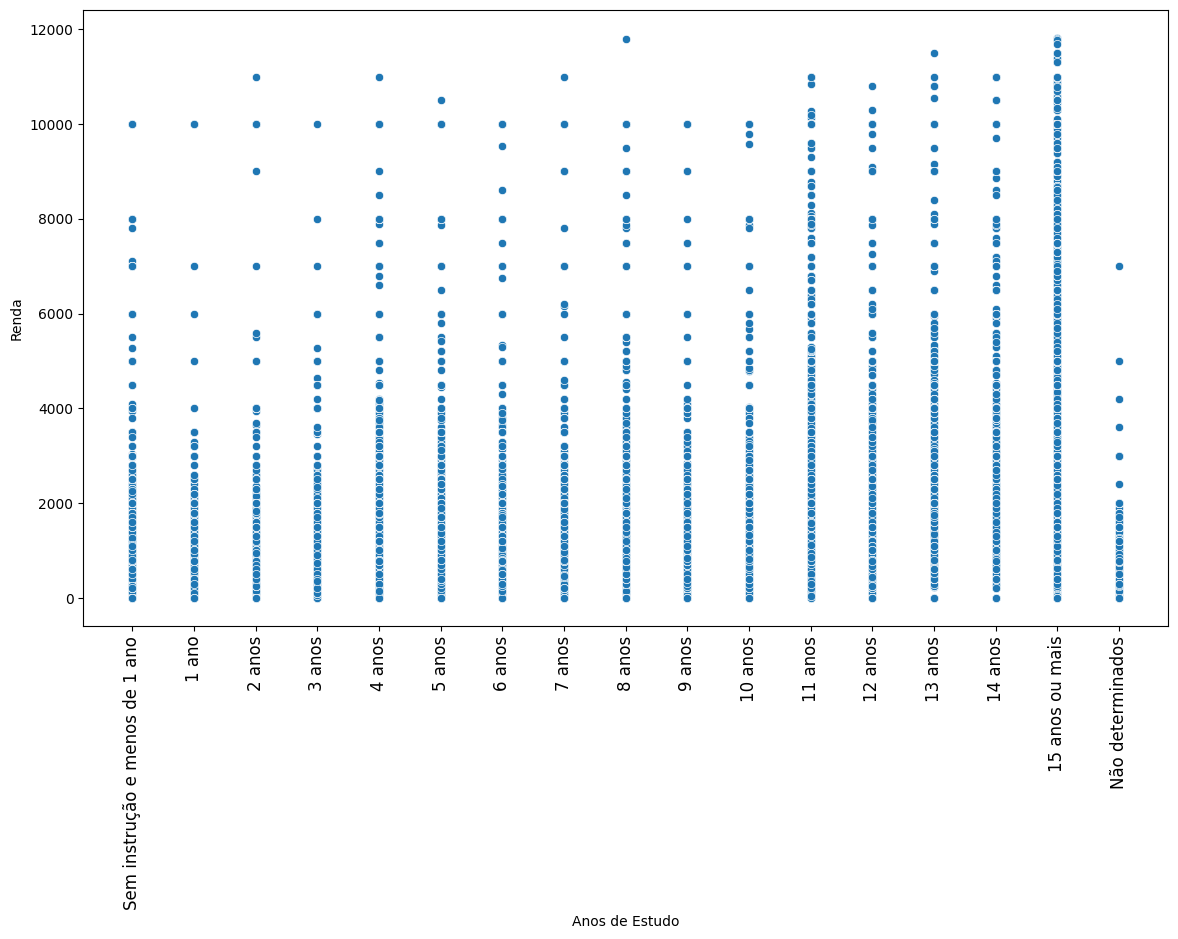

In [29]:
ax = sns.scatterplot(data = dados.query('Renda < 12000'), x = 'Anos de Estudo', y = 'Renda')
ax.figure.set_size_inches(14, 8)
todos_anos_de_estudo = list(range(1, 18))
ax.set_xticks(todos_anos_de_estudo)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticklabels([key for key in anos_de_estudo.values()], fontsize=12)
ax

Pode-se usar o lmplot, que plota os dados e realiza uma regressão linear para tentar se ajustar aos dados.

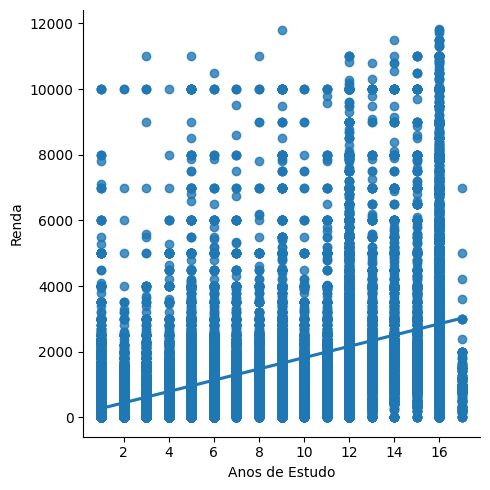

In [30]:
ax = sns.lmplot(data = dados.query('Renda < 12000'), x = 'Anos de Estudo', y = 'Renda')
ax

#### Modelagem através de OLS

Vamos desenvolver um modelo de regressão. Para tanto utiliza-se a renda como variável alvo e os anos de estudo como variável explicativa. Serão removidos os valores de anos de estudo indeterminado, pois podem atrapalhar as análises.

In [31]:
selecao = dados[dados['Anos de Estudo'] < 17]
selecao['Anos de Estudo'].unique()

array([12, 15,  6,  9, 14, 16, 10,  1,  5,  7,  3,  2,  4,  8, 11, 13])

In [32]:
Y = selecao['Renda']
X = selecao['Anos de Estudo']

In [33]:
dataset = pd.DataFrame({'X':X, 'Y': Y})
dataset.head()

,X,Y
0,12,800
1,12,1150
2,15,880
3,6,3500
4,9,150


In [34]:
X = sm.add_constant(X)

In [35]:
modelo = sm.OLS(Y,X,missing='drop')
resultado = modelo.fit()
resultado

In [36]:
resultado.params

const            -319.166094
Anos de Estudo    245.676446
dtype: float64

In [37]:
significancia = 0.05
resultado.conf_int(alpha = significancia)

,0,1
const,-370.519469,-267.812718
Anos de Estudo,240.776527,250.576366


In [38]:
dataset['Predito'] = resultado.predict()
dataset.head()

,X,Y,Predito
0,12,800,2628.951260
1,12,1150,2628.951260
2,15,880,3365.980598
3,6,3500,1154.892583
4,9,150,1891.921921


In [39]:
dataset['Residuos'] = resultado.resid
dataset.head()

,X,Y,Predito,Residuos
0,12,800,2628.951260,-1828.951260
1,12,1150,2628.951260,-1478.951260
2,15,880,3365.980598,-2485.980598
3,6,3500,1154.892583,2345.107417
4,9,150,1891.921921,-1741.921921


<Axes: title={'center': 'Resíduos vs Y_Previsto'}, xlabel='Y_Previsto', ylabel='Resíduos'>

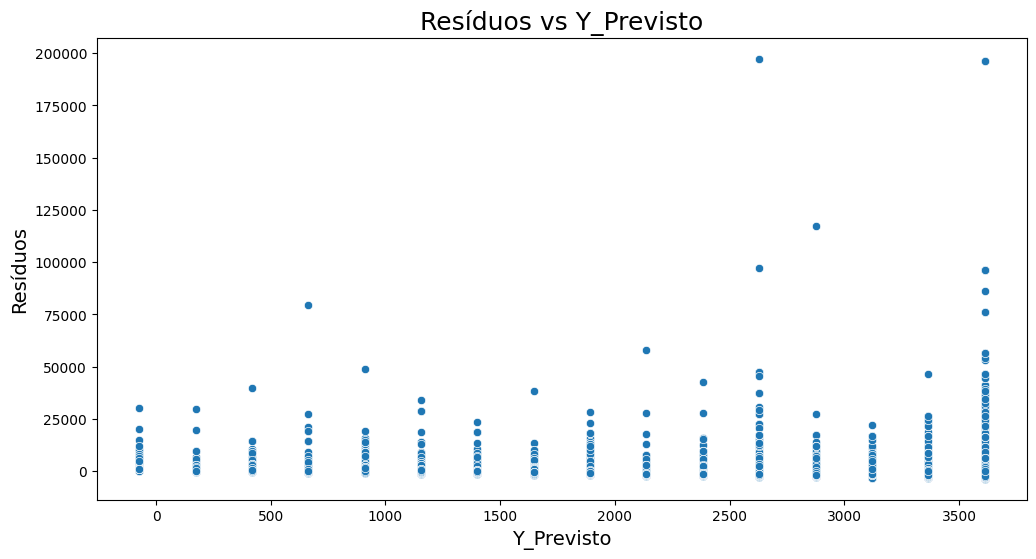

In [40]:
ax = sns.scatterplot(x=dataset['Predito'], y=dataset['Residuos'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Y_Previsto', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

In [41]:
resultado.rsquared

0.11189900895941784

In [42]:
resultado.mse_resid

9830149.515194941

In [43]:
resultado.pvalues[1]

0.0

In [44]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                  Renda   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     9657.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:10:14   Log-Likelihood:            -7.2582e+05
No. Observations:               76649   AIC:                         1.452e+06
Df Residuals:                   76647   BIC:                         1.452e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -319.1661     26.201    -12.

Daqui já é possível inferir que o modelo utilizando apenas os anos de estudo para prever a renda não explica bem os dados, dado que o R² é muito baixo.

#### Modelagem com LinearRegression

In [45]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,12,800,1.603808
1,Rondônia,Feminino,23,Branca,12,1150,1.739790
2,Rondônia,Feminino,35,Parda,15,880,1.760444
3,Rondônia,Masculino,46,Branca,6,3500,1.783158
4,Rondônia,Feminino,47,Parda,9,150,1.690631


In [46]:
y = selecao['Renda']
X = selecao.drop(['UF', 'Sexo', 'Idade', 'Cor', 'Renda', 'Altura'], axis=1)

In [47]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [48]:
print(X_treino.shape)

(53654, 1)


In [49]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_treino, y_treino)
y_previsto = modelo.predict(X_teste)

In [50]:
score = modelo.score(X_treino, y_treino)
print(score)

0.10843096168563138


In [51]:
from sklearn import metrics

R2 = metrics.r2_score(y_teste, y_previsto)
print(R2)
EQM = metrics.mean_squared_error(y_teste, y_previsto)
print(EQM)

0.1212317639336492
8525918.150567621


No final verifica-se que ao utilizar diferentes modelos de regressão considerando apenas a variável anos de estudo para prever a renda, não é uma boa inferência. Mostrando que a mais características precisam ser consideradas para prever a renda de maneira mais acertiva.